In [1]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np

In [2]:

from trackeddy.trackeddy import *
from trackeddy.generator.gaussian_field_functions import *
from trackeddy.geometry import *


In [3]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/sla_0.25degs_interp_for_eddy_tracking_l4-duacs.nc'

In [4]:
TEddy = TrackEddy(dataset=filepath,variable='sla')

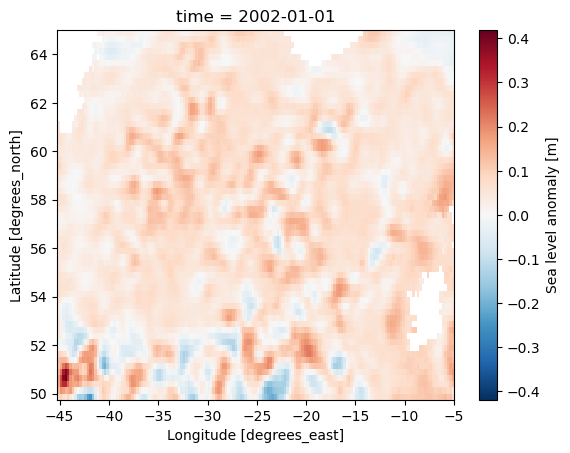

In [5]:
TEddy.rawdata.isel(time=0).plot()

In [6]:
TEddy._filter_data_(TEddy.rawdata.isel(time=0),'space')

In [7]:
eddies, discarded = TEddy._detect_one_level(0.01)

In [8]:
TEddy.skip_gaussian_fit = True

In [9]:
lin_levels = np.arange(-0.4,0.4,0.005)

df_eddy_multilevel_store = TEddy._detect_snapshot(0,lin_levels)

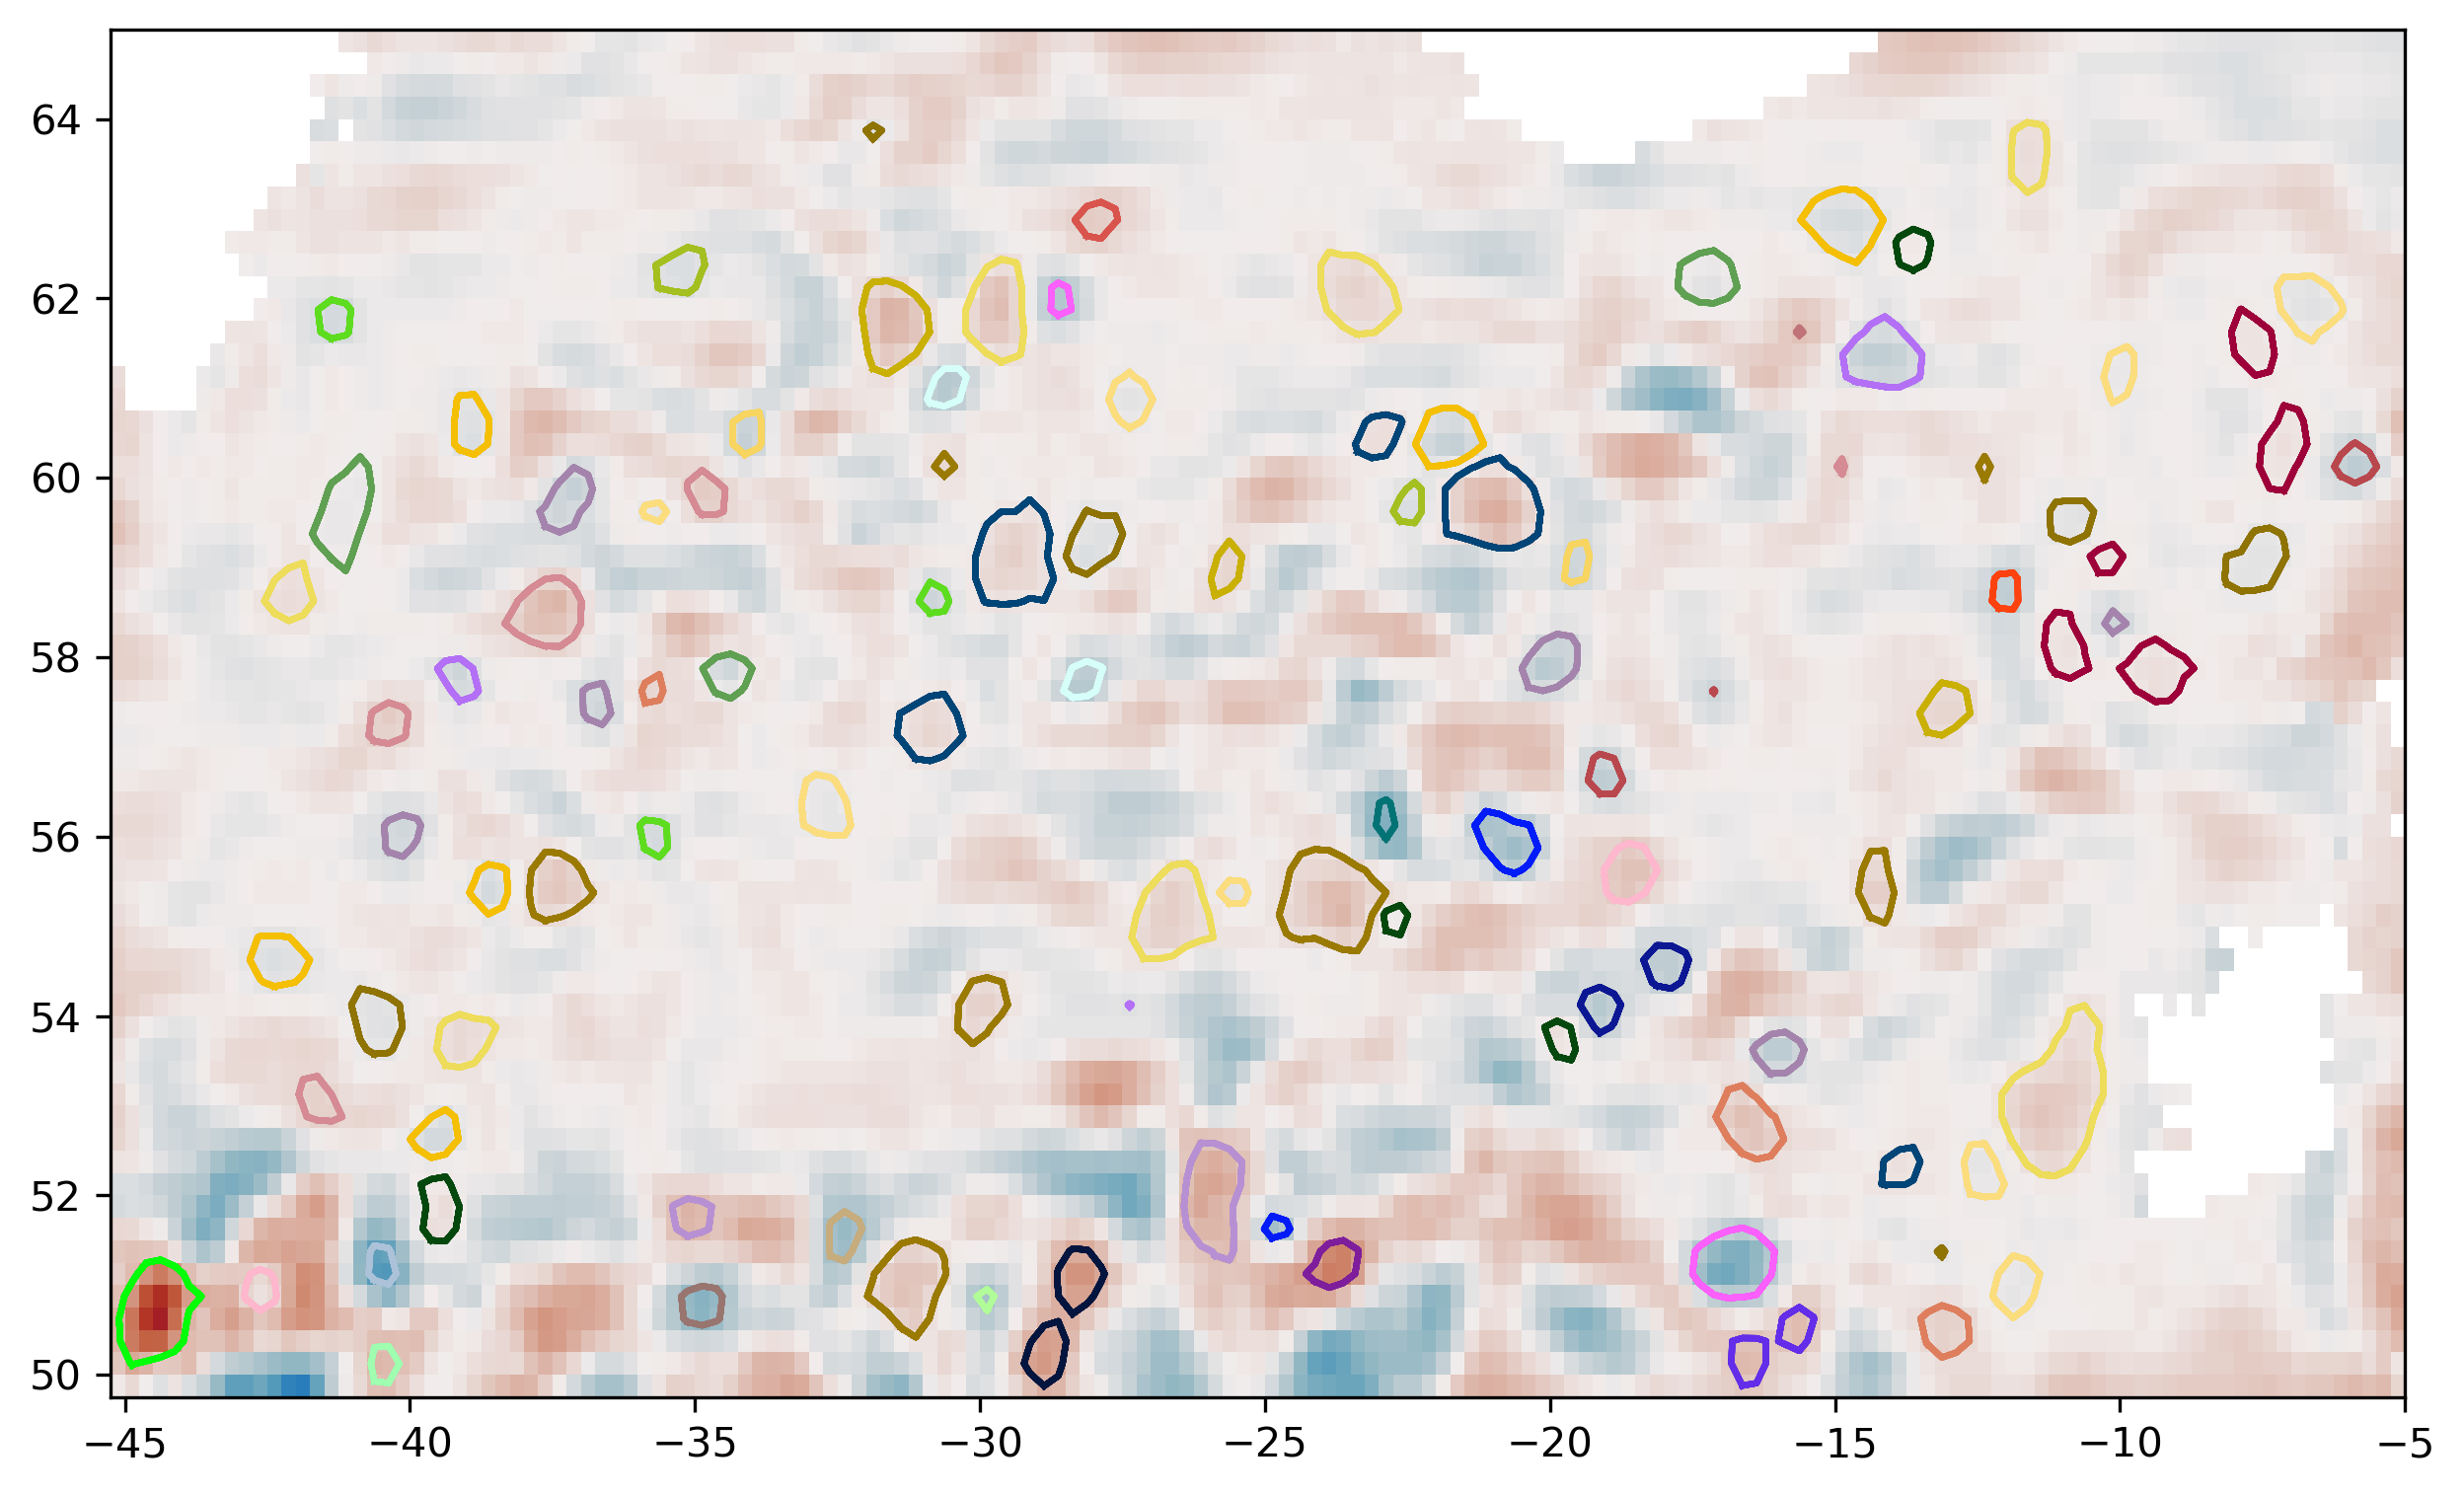

In [10]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [11]:
# online track = False means that each snapshot will be stored to disk.

track_in_time = TEddy.time_tracking( t0=0,tf=100,lin_levels=lin_levels,ntimes=5,online_track=False)

 0% [==========>]100% | Time: 618 s | Estimated Time: 618 s | Info:# of E 108 |

In [12]:
# def _get_non_duplicated_identifiers(merged_identifiers):
    
#     values, counts = np.unique(merged_identifiers, return_counts=True)

#     duplicated=[]
#     for count in range(0,len(counts)):
#         if counts[count] >=2:
#             duplicated.append(count)

#     values = np.delete(values, duplicated)
#     return values

# time=1
# ntimes=5

# # Move to decorator
# if time < ntimes:
#     ntimes=time
# # Extract identifier of eddies identified as the last imput in the table.
# last_identified_eddies = track_in_time.xs(time,level='time').index.levels[0]

# # Loop and arrays to contain extracted identifier of eddies identified in the last ntimes in the table.
# unlinked_tracks_in_time = last_identified_eddies
# unlinked_times = np.ones_like(last_identified_eddies)*time
# # Loop back in time to check if missing a eddy track
# for prev_time in np.arange(time-ntimes,time):
#     # Extracted identifier of eddies identified in the last time-ntimes in the table.
#     previous_identified_eddies = track_in_time.xs(prev_time,level='time').index.levels[0]

#     merged_identifiers= np.hstack((last_identified_eddies,previous_identified_eddies))
    
#     values = _get_non_duplicated_identifiers(merged_identifiers)

#     unlinked_tracks_in_time = np.hstack((unlinked_tracks_in_time,values))
#     unlinked_times = np.hstack((unlinked_times,np.ones_like(values)*prev_time))

# unlinked_tracks_in_time = np.unique(unlinked_tracks_in_time)

# times = track_in_time.loc[unlinked_tracks_in_time].reset_index().groupby('identifier').max('time')['time'].values

# eddies_to_track = track_in_time.loc[unlinked_tracks_in_time].groupby(['identifier','index']).last('time')

# eddies_to_track['time']=[ times[index] for index,n in eddies_to_track.index]

# eddies_to_track = eddies_to_track.reset_index().set_index(['identifier','time','index'])

# previous_time = eddies_to_track.reindex(track_in_time.index.levels[0],level=0,fill_value=0)

In [13]:
#TODO Check if the function above is doing what we expect.

# ISSUE:
# There seems to be a missmatch between the previous time and the new time in the time_tracking function, particularly when using unlink_eddies_in_previous_times


# IT seems to be doing the right thing, but there are some contours that are been identified that should not, perhaps make the criteria more strict. 


# FIXED:
    # Currently the distance function is doing something strange, but likely it has to do more with the renaming of eddies in time i.e. _rename_eddies_in_time

    # The issue occurs, because passing a detect_nearest an incomplete array with only the times identified at t=time-1, does not match the overall shape of the table, thus there is a shift in the index that is not accounted for.  


In [14]:
# # colors = ['r','b','k','g','m','orange','pink','cyan','gray','steelblue']
# for eddy in track_in_time.index.get_level_values(level=0).unique():
#     times = track_in_time.loc[eddy].index.get_level_values(level=0).unique()
#     # num_colors = times.max()

#     if len(times)<2:
#         continue

#     for time in times:
#         x_contour = track_in_time.loc[eddy,time].contour_path_x
#         y_contour = track_in_time.loc[eddy,time].contour_path_y 

#         plt.plot(x_contour,y_contour,linestyle='-',color='k')
    
#     # plt.title(eddy)
#     # plt.show()

    

In [15]:
plt.figure(figsize=(10,10),dpi=300)
for eddy in track_in_time.index.get_level_values(level=0).unique():
    times = track_in_time.loc[eddy].index.get_level_values(level=0).unique()
    # num_colors = times.max()

    if len(times)<10:
        continue
    
    # for time in times:
    x_contour = track_in_time.loc[eddy,:,0].contour_x.values
    y_contour = track_in_time.loc[eddy,:,0].contour_y.values

    plt.plot(x_contour[0],y_contour[0],marker='o',color='g')
    plt.plot(x_contour,y_contour,linestyle='-',color='k')
    plt.plot(x_contour[-1],y_contour[-1],marker='o',color='r')
    
    # plt.title(eddy)
    # plt.show()

    

<Figure size 3000x3000 with 0 Axes>

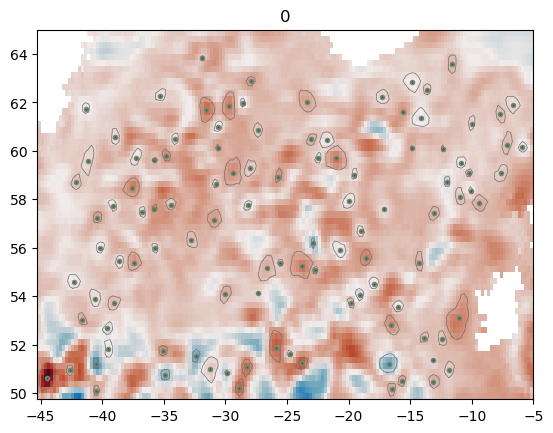

In [32]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

# plt.figure(figsize=(10,10),dpi=300)
for time in track_in_time.index.levels[1]:
    clear_output(wait=True)
    plt.title(time)
    current_eddies = track_in_time.xs(time,level=1)
    current_location = track_in_time.xs((time,0),level=(1,2))
    plt.pcolormesh(TEddy.X,TEddy.Y,TEddy.rawdata.isel(time=time),vmin=-0.4,vmax=0.4,cmap=cm.cm.balance)
    plt.plot(current_location.contour_x,current_location.contour_y,marker='.',color='grey',linestyle='')

    for identifier in current_eddies.index.get_level_values(0).unique():
        eddy = current_eddies.loc[identifier]
        plt.plot(eddy.contour_path_x,eddy.contour_path_y,color='grey',linestyle='-',linewidth=0.5)

        track = track_in_time.loc[identifier].loc[slice(0,time)]

        plt.plot(track.xs(0,level=1).contour_x,track.xs(0,level=1).contour_y,'-k')

        plt.plot(track.iloc[0].contour_x,track.iloc[0].contour_y,color='g',marker='o',markersize=0.5)

        # plt.plot(track.iloc[-1].contour_x,track.iloc[-1].contour_y,color='m',marker='o',markersize=0.5)
        unique_times = track.index.get_level_values(0).unique()
        for pass_time in range(0,len(unique_times)):
            plt.plot(track.loc[unique_times[pass_time]].contour_path_x,track.loc[unique_times[pass_time]].contour_path_y,color='k',linestyle='-',linewidth=0.5,alpha=0.1 )

    plt.pause(0.1)
    plt.show()


In [17]:
# track_in_time.loc[0,:]#.contour_x

In [18]:
tracked_eddies = track_in_time.reset_index().set_index(['identifier','time','index']).sort_index(level=1)

In [19]:
# tracked_eddies.loc[0]

In [20]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [21]:
filepath = "/Users/jmtzmo/Downloads/sla_for_tracking/interp_for_tracking/sla_0.25degs_interp_for_eddy_tracking_NATL.nc"

In [22]:
TEddy_model = TrackEddy(dataset=filepath,variable='sla')

In [23]:
TEddy_model.identification_criteria['gaussian_fit']=0.5
TEddy_model.identification_criteria['eccentricity']=0.9
# TEddy_model.skip_gaussian_fit = True

In [24]:
TEddy_model._filter_data_(TEddy_model.rawdata.isel(time_dim=0),filter='space')
eddies, discarded = TEddy_model._detect_one_level(0.1)

In [25]:
discarded

,reason,level,area_eddy,radius_eddy,contour_ellipse_error,contour_x,contour_y,ellipse_eccen,eddy_sign,eddy_maxima,contour_gaussian_error
0,ellipse_area,0.180,9.415497e+02,17.311978,0,-44.767831,50.499872,0.000000,0,0,0
1,ellipse_area,0.185,7.883752e+02,15.841326,0,-44.767599,50.498499,0.000000,0,0,0
2,ellipse_area,0.190,6.042851e+02,13.869028,0,-44.772205,50.538627,0.000000,0,0,0
3,ellipse_area,0.195,2.135436e+02,8.244577,0,-44.833048,50.570299,0.000000,0,0,0
4,ellipse_area,0.200,4.901667e+01,3.949999,0,-44.854902,50.598794,0.000000,0,0,0
5,ellipse_area,0.100,4.058396e+05,359.420009,0,93.637674,2.184364,0.000000,0,0,0
6,ellipse_area,0.100,1.643280e+04,72.323740,0,2.287456,2.534037,0.000000,0,0,0
7,ellipse_area,0.100,4.448912e+04,119.001370,0,41.805560,2.102645,0.000000,0,0,0
8,ellipse_area,0.100,5.612372e+04,133.659028,0,36.498958,3.331474,0.000000,0,0,0
9,ellipse_area,0.100,2.352155e+03,27.362644,0,22.319617,5.000784,0.000000,0,0,0


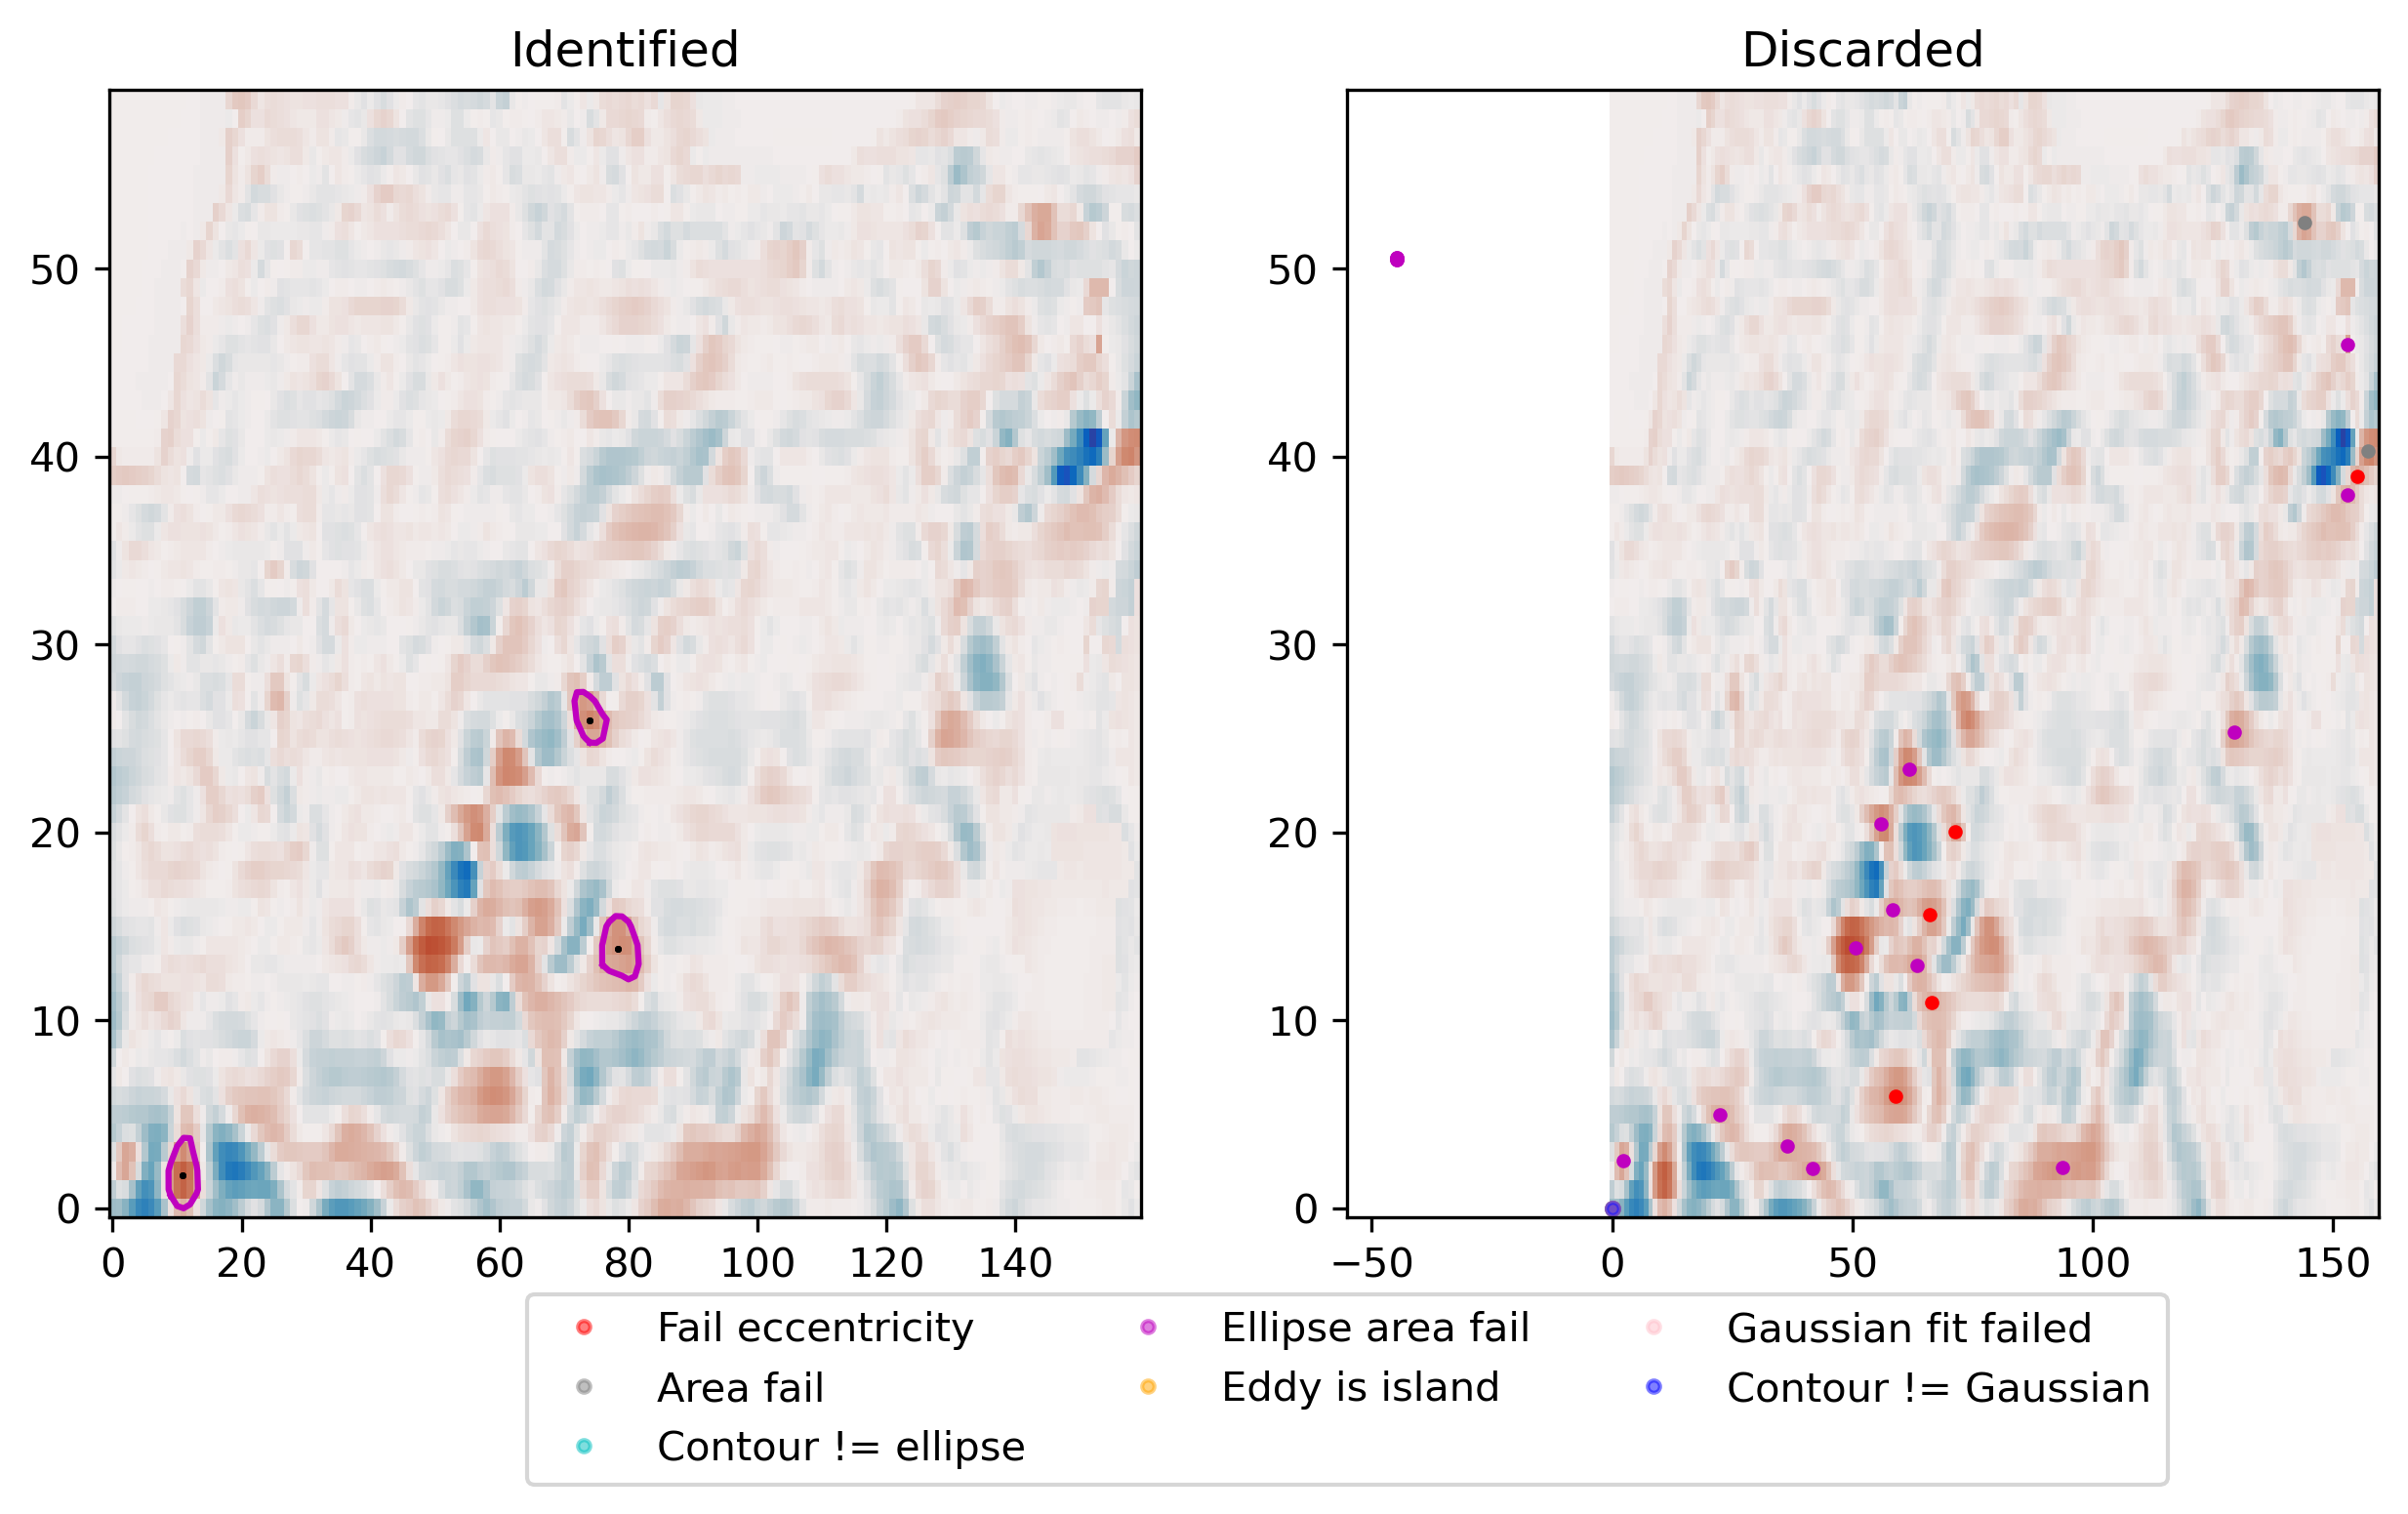

In [26]:
TEddy_model.plot_eddy_detection_in_level(eddies, discarded,markersize=5)

In [27]:
lin_levels = np.arange(-0.4,0.4,0.01)

df_eddy_multilevel_store = TEddy_model._detect_snapshot(0,lin_levels)

In [28]:
# df_eddy_multilevel_store#.loc[3]

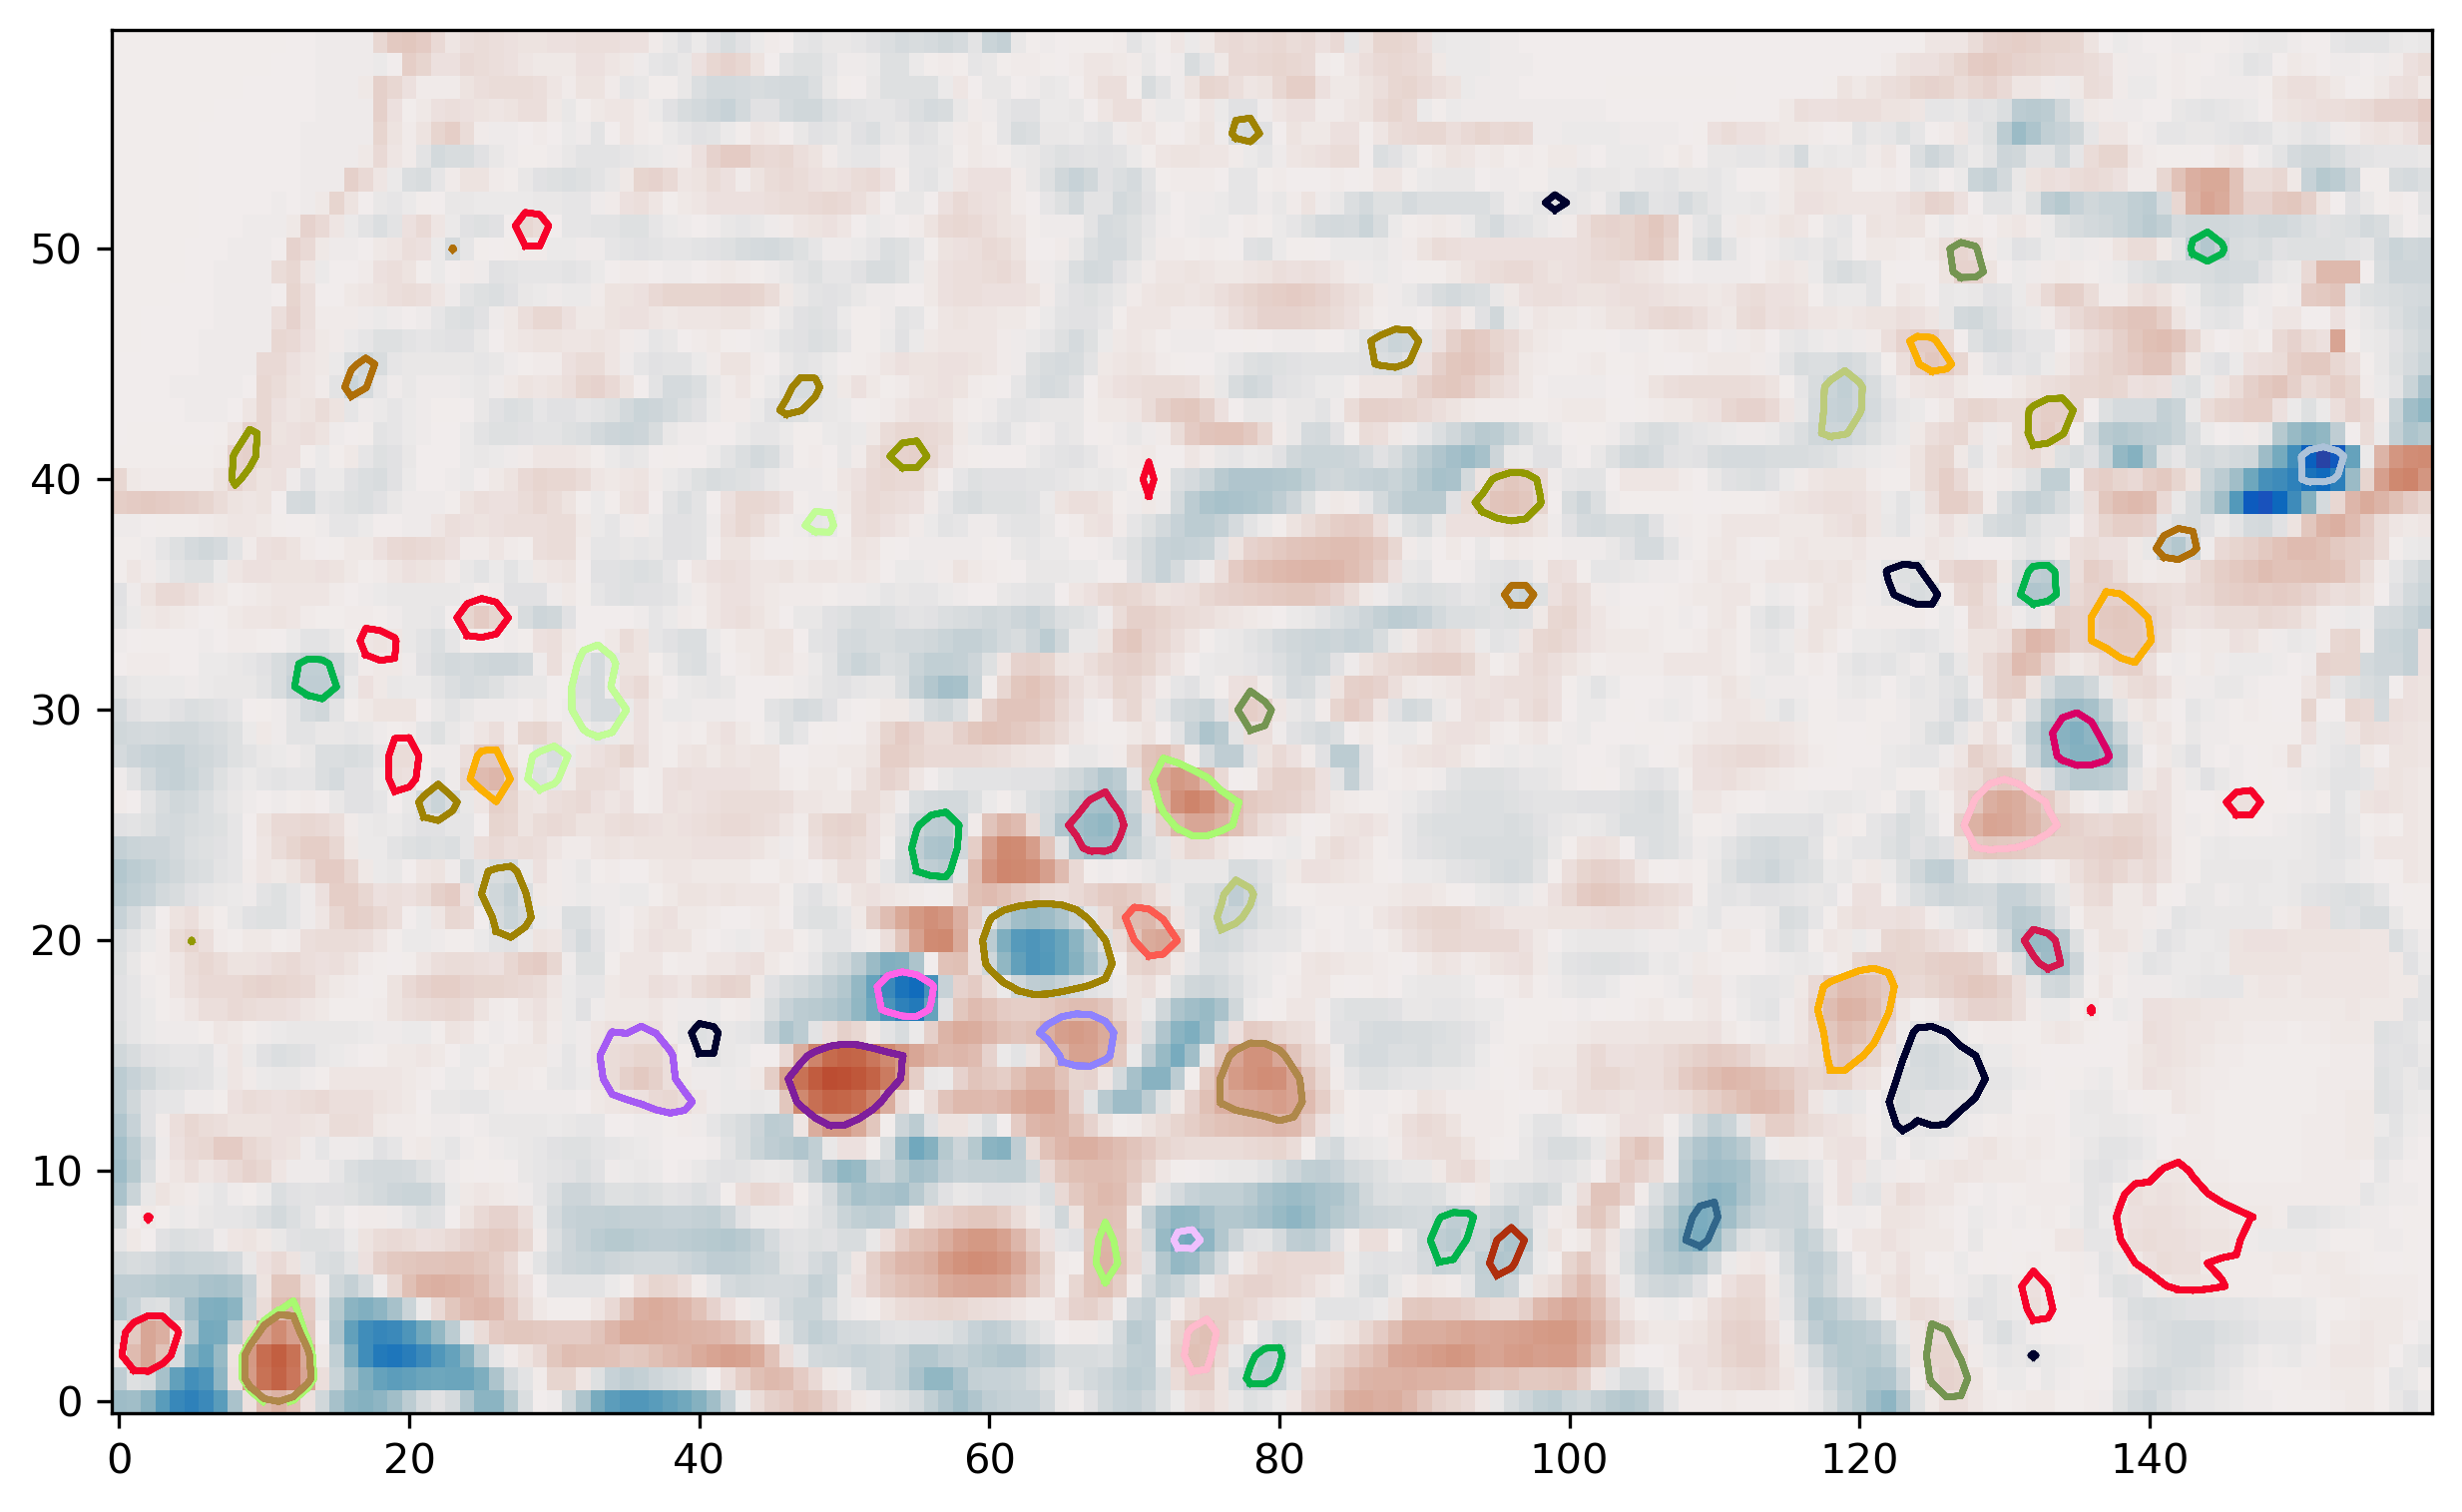

In [29]:
TEddy_model.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [30]:
track_in_time_model = TEddy_model.time_tracking( t0=0,tf=100,lin_levels=lin_levels,ntimes=5,online_track=True)

 0% [==========>]100% | Time: 471 s | Estimated Time: 471 s | Info:# of E 1498 |

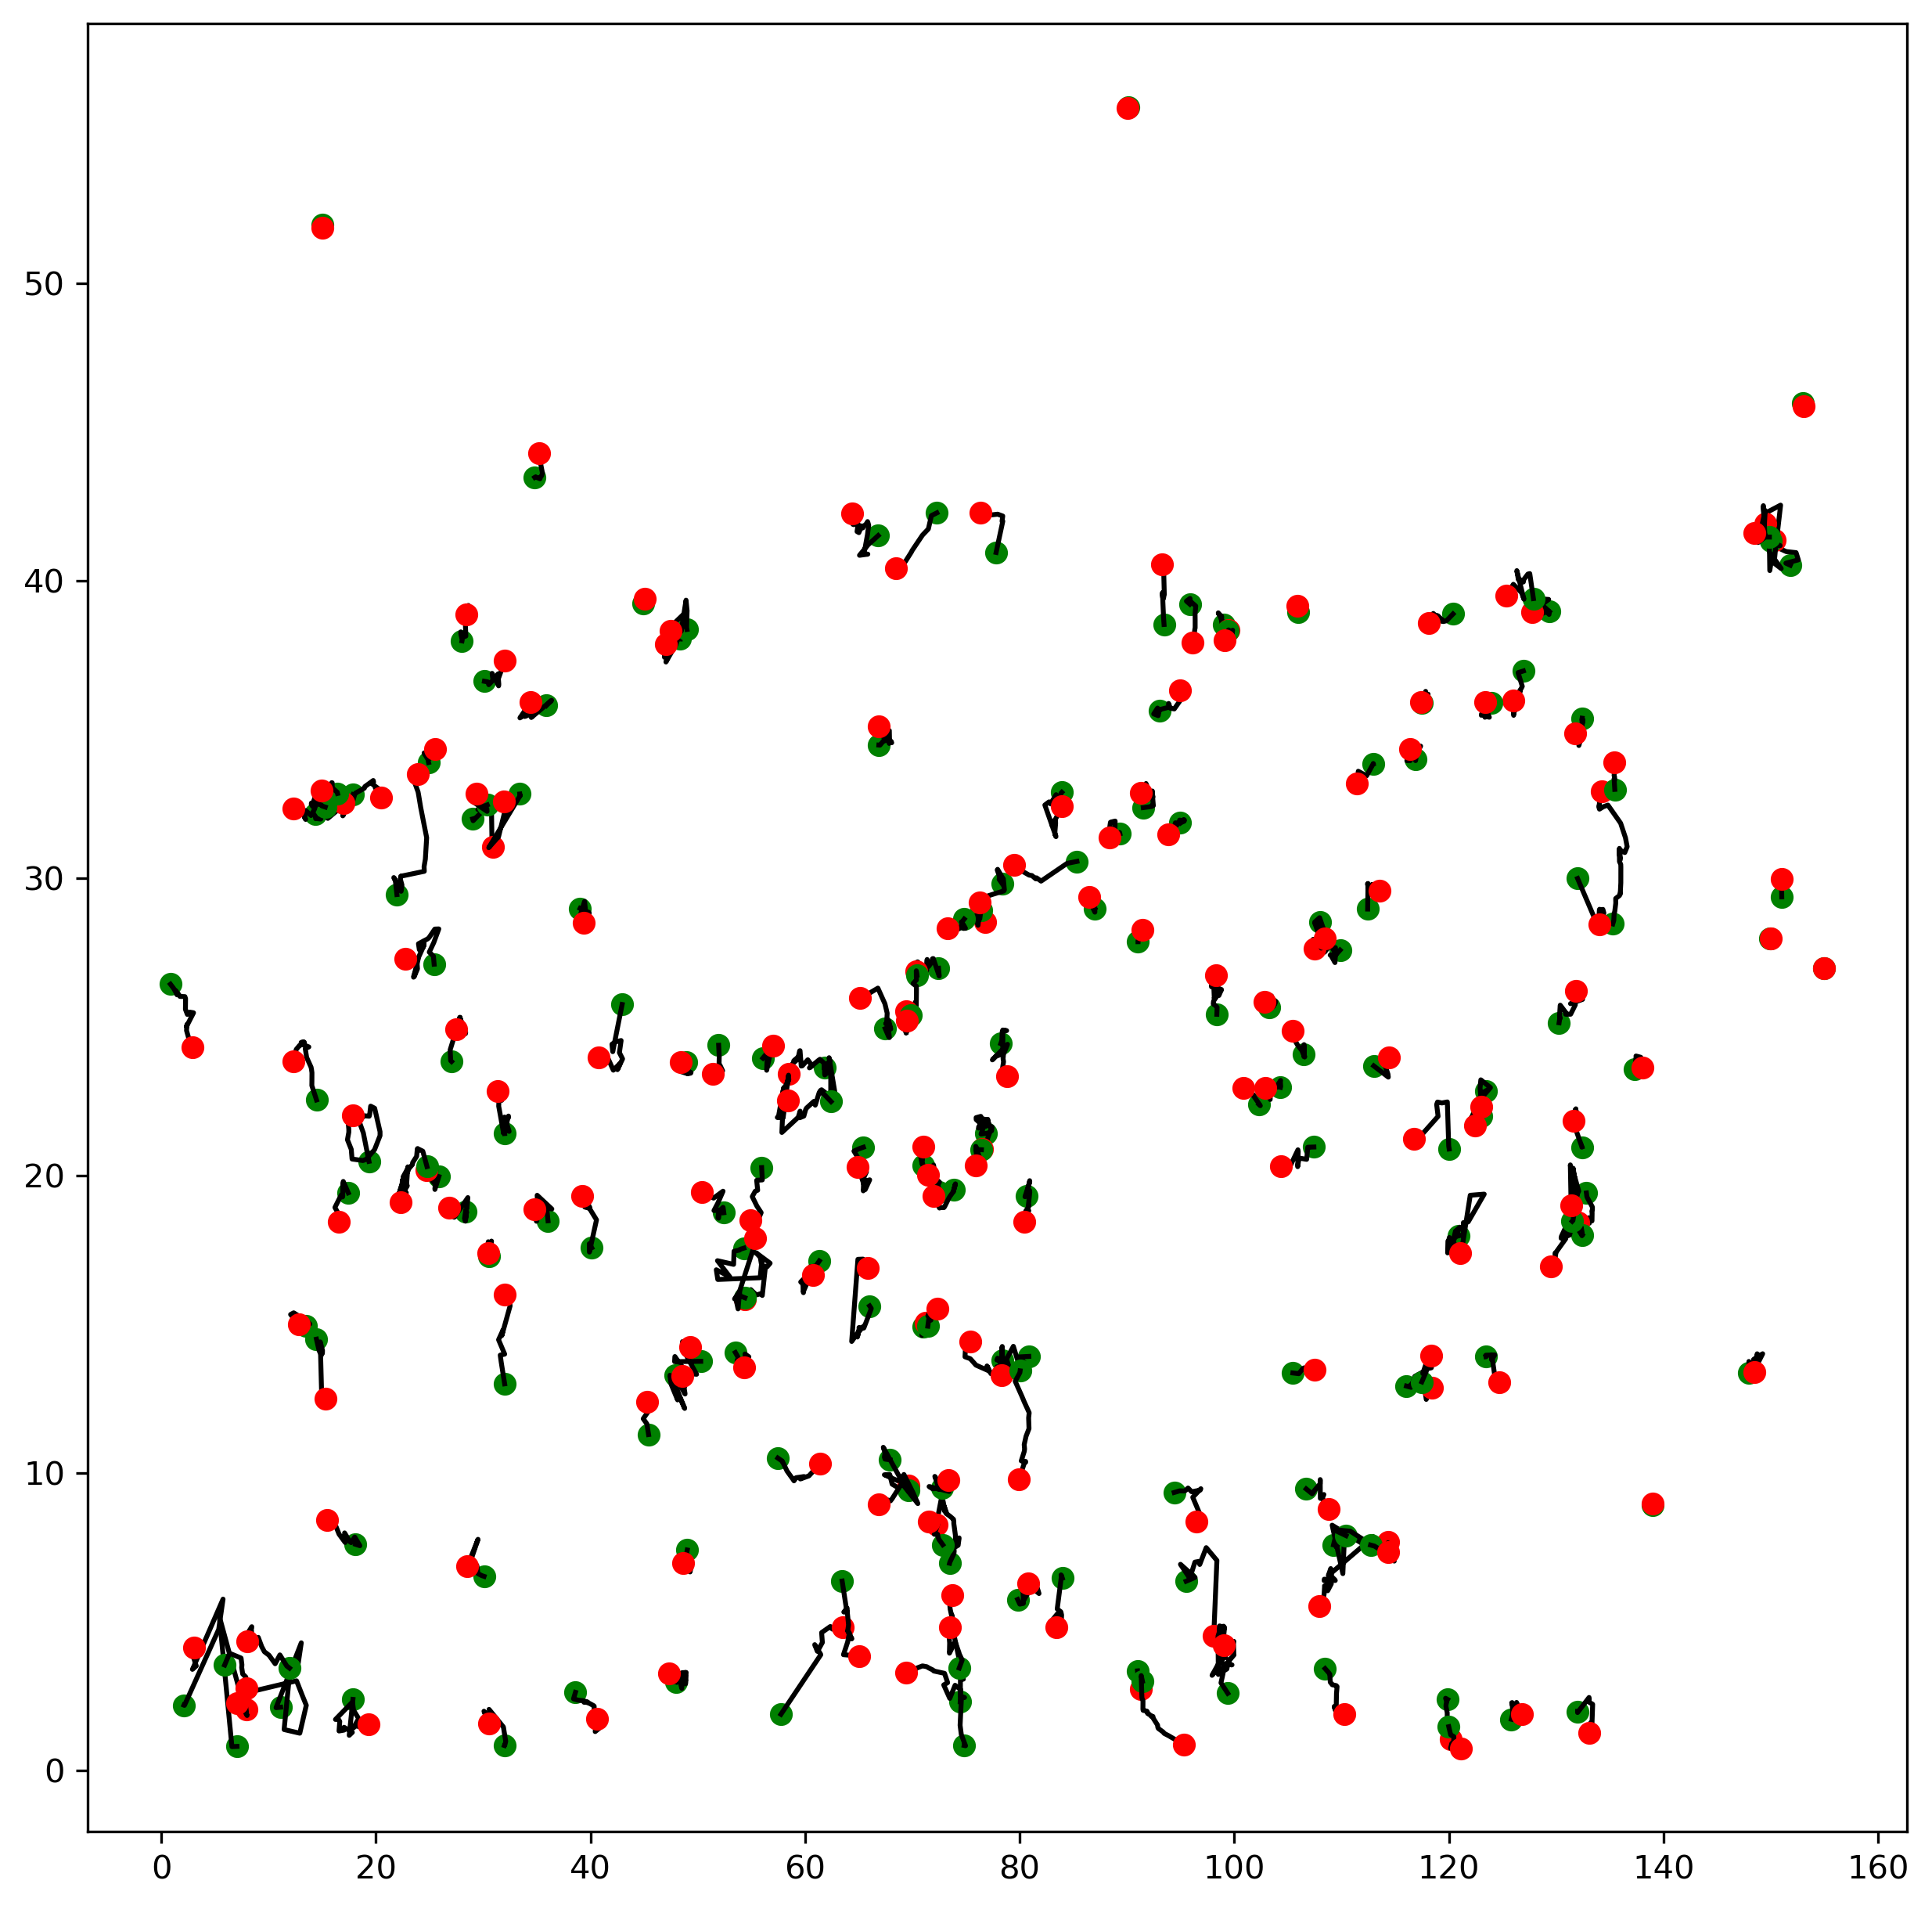

In [36]:
plt.figure(figsize=(10,10),dpi=300)
for eddy in track_in_time_model.index.get_level_values(level=0).unique():
    times = track_in_time_model.loc[eddy].index.get_level_values(level=0).unique()
    # num_colors = times.max()

    if len(times)<10:
        continue
    
    # for time in times:
    x_contour = track_in_time_model.loc[eddy,:,0].contour_x.values
    y_contour = track_in_time_model.loc[eddy,:,0].contour_y.values

    plt.plot(x_contour[0],y_contour[0],marker='o',color='g')
    plt.plot(x_contour,y_contour,linestyle='-',color='k')
    plt.plot(x_contour[-1],y_contour[-1],marker='o',color='r')
    
    

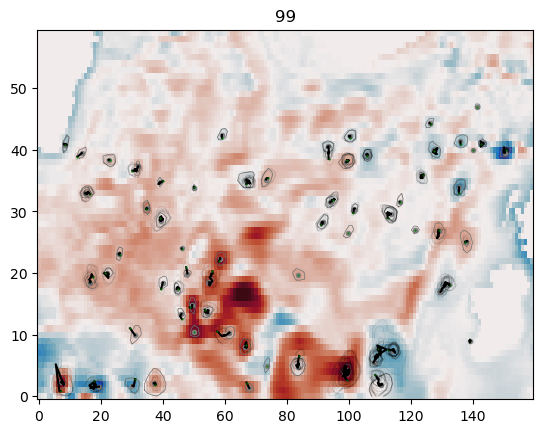

In [31]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

# plt.figure(figsize=(10,10),dpi=300)
for time in track_in_time_model.index.levels[1]:
    clear_output(wait=True)
    plt.title(time)
    current_eddies = track_in_time_model.xs(time,level=1)
    current_location = track_in_time_model.xs((time,0),level=(1,2))
    plt.pcolormesh(TEddy_model.X,TEddy_model.Y,TEddy_model.rawdata.isel(time_dim=time),vmin=-0.4,vmax=0.4,cmap=cm.cm.balance)
    plt.plot(current_location.contour_x,current_location.contour_y,marker='.',color='grey',linestyle='')

    for identifier in current_eddies.index.get_level_values(0).unique():
        eddy = current_eddies.loc[identifier]
        plt.plot(eddy.contour_path_x,eddy.contour_path_y,color='grey',linestyle='-',linewidth=0.5)

        track = track_in_time_model.loc[identifier].loc[slice(0,time)]

        plt.plot(track.xs(0,level=1).contour_x,track.xs(0,level=1).contour_y,'-k')

        plt.plot(track.iloc[0].contour_x,track.iloc[0].contour_y,color='g',marker='o',markersize=0.5)

        # plt.plot(track.iloc[-1].contour_x,track.iloc[-1].contour_y,color='m',marker='o',markersize=0.5)
        unique_times = track.index.get_level_values(0).unique()
        for pass_time in range(0,len(unique_times)):
            plt.plot(track.loc[unique_times[pass_time]].contour_path_x,track.loc[unique_times[pass_time]].contour_path_y,color='k',linestyle='-',linewidth=0.5,alpha=0.1 )

    plt.pause(0.1)
    plt.show()
